In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("student_scores.csv")

In [10]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  Nr

In [7]:
#want to show hoe many null values is present in given dataframe
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

#Drop unmaned column


In [11]:
df = df.drop("Unnamed: 0", axis = 1) #axis=1 refer to verical col
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [12]:
#Data Tranformation
#To replace the any bug from our dataset for exmaple if any string is there in any row instead of number we can change that
#df["column_name"] = df["column_name"] str.replace("string","our value")

In [13]:
#Data Analysis
#Gender distribution/// seaborn==count plot will distribute the values

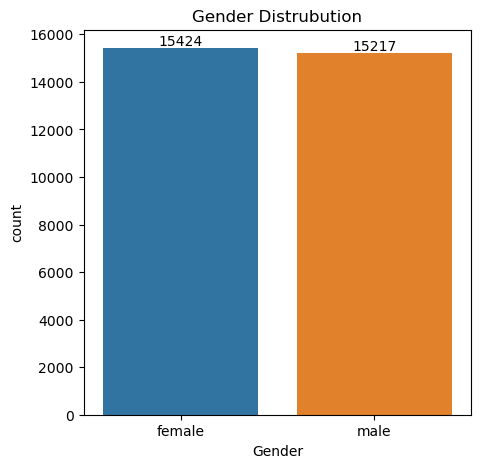

In [28]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data = df, x= "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distrubution")
plt.show()

In [18]:
# from the above chart we have analysed that:
#the number of females in the data is more than the number of males

In [19]:
gb= df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


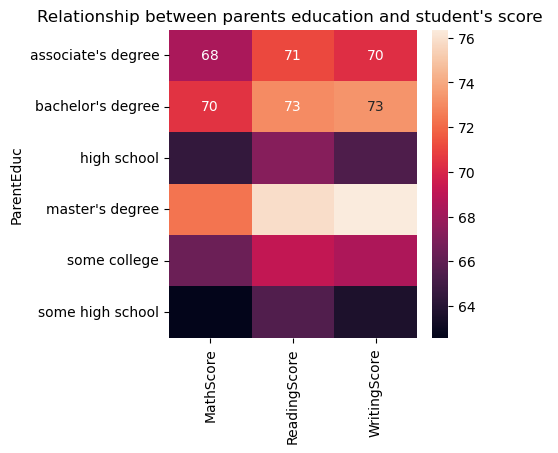

In [27]:
#heat map used for aggregate(impact of  parents education have good impact on childs marks)
plt.figure(figsize=(4,4))
sns.heatmap(gb, annot = True)
plt.title("Relationship between parents education and student's score ")
plt.show()

In [24]:
gb1= df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


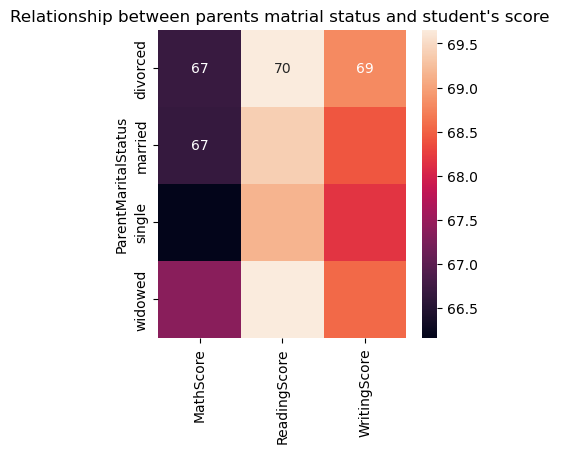

In [29]:
plt.figure(figsize=(4,4))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between parents matrial status and student's score ")
plt.show()

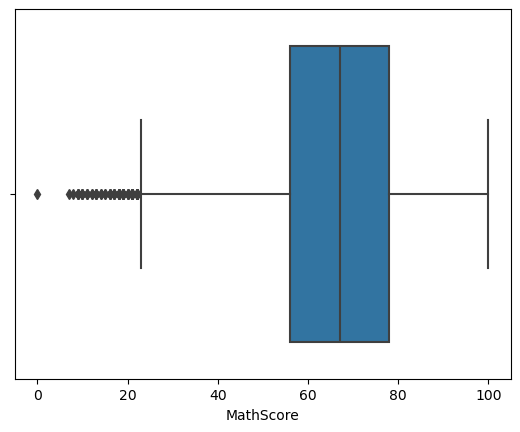

In [30]:
#outlier means extreame valuse between diff subjects
#range is there between the plot
sns.boxplot(data = df, x= "MathScore")
plt.show()

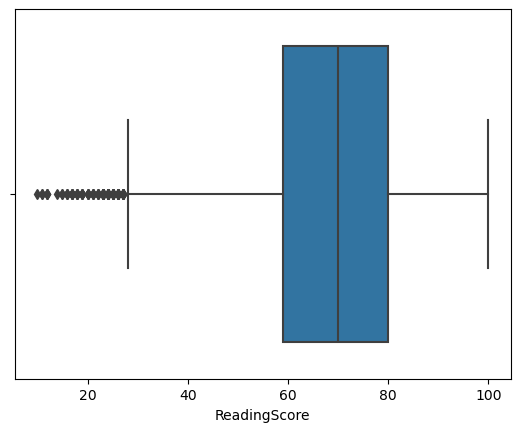

In [31]:
sns.boxplot(data = df, x= "ReadingScore")
plt.show()

In [40]:
#print unique values
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [42]:
#Distrubution of Ethnic Group
groupA= df.loc[(df['EthnicGroup'] == "group A")].count()
groupB= df.loc[(df['EthnicGroup'] == "group B")].count()
groupC= df.loc[(df['EthnicGroup'] == "group C")].count()
groupD= df.loc[(df['EthnicGroup'] == "group D")].count()
groupE= df.loc[(df['EthnicGroup'] == "group E")].count()
print(groupA["EthnicGroup"])
#mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"],groupE["EthnicGroup"]]
#plt.pie([mlist])
#plt.show()

2219


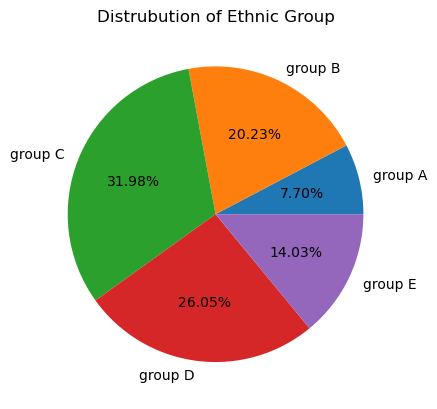

In [48]:
l = ["group A", "group B",  "group C", "group D", "group E", ]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist, labels = l, autopct= "%1.2f%%")
plt.title("Distrubution of Ethnic Group")
plt.show()